<a href="https://colab.research.google.com/github/Rukawuba/Bank_ML/blob/main/LRP_Banking_Campaign_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
bank_ds = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv" , sep=';')
bank_ds

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bank_ds.shape

(41188, 21)

In [6]:
bank_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
#Dropping Duplicates
bank_ds2 = bank_ds.drop_duplicates().reset_index(drop = True)
bank_ds2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
bank_ds2['y'] != 'no'

0        False
1        False
2        False
3        False
4        False
         ...  
41171     True
41172    False
41173    False
41174     True
41175    False
Name: y, Length: 41176, dtype: bool

In [10]:
specific_index_row = bank_ds2.loc[41171]
specific_index_row

age                                73
job                           retired
marital                       married
education         professional.course
default                            no
housing                           yes
loan                               no
contact                      cellular
month                             nov
day_of_week                       fri
duration                          334
campaign                            1
pdays                             999
previous                            0
poutcome                  nonexistent
emp.var.rate                     -1.1
cons.price.idx                 94.767
cons.conf.idx                   -50.8
euribor3m                       1.028
nr.employed                    4963.6
y                                 yes
Name: 41171, dtype: object

In [11]:
bank_ds2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
"""After checking all columns it doesn't seem like any of these wont exactly be needed..
 All serve a purpose.. So we will keep them.. we can check one more time and run it by what we are looking for.  """


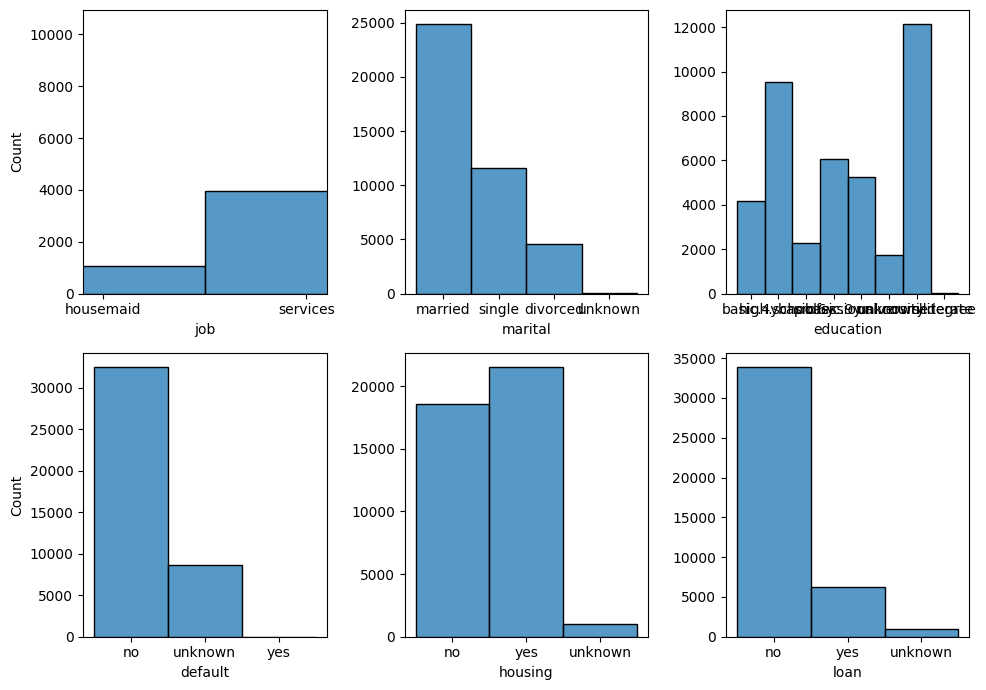

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'bank_df' is your DataFrame

# Set the column names (corrected approach)
"""bank_ds2.columns = ["job", "marital", "education", "default", "housing",
                   "loan", "contact", "month", "day_of_week", "poutcome"]
"""

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = bank_ds2, x = "job").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = bank_ds2, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = bank_ds2, x = "education").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = bank_ds2, x = "default")
sns.histplot(ax = axis[1, 1], data = bank_ds2, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = bank_ds2, x = "loan").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

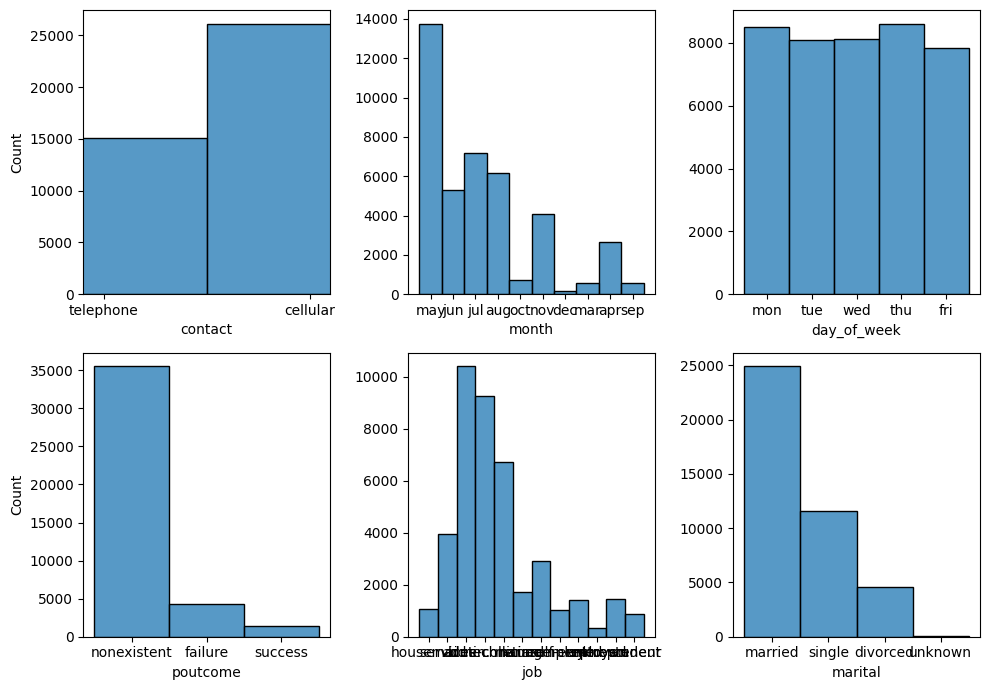

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'bank_df' is your DataFrame

# Set the column names (corrected approach)
"""bank_df2.columns = ["job", "marital", "education", "default", "housing",
                   "loan", "contact", "month", "day_of_week", "poutcome"]
"""

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = bank_ds2, x = "contact").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = bank_ds2, x = "month").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = bank_ds2, x = "day_of_week").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = bank_ds2, x = "poutcome")
sns.histplot(ax = axis[1, 1], data = bank_ds2, x = "job").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = bank_ds2, x = "marital").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

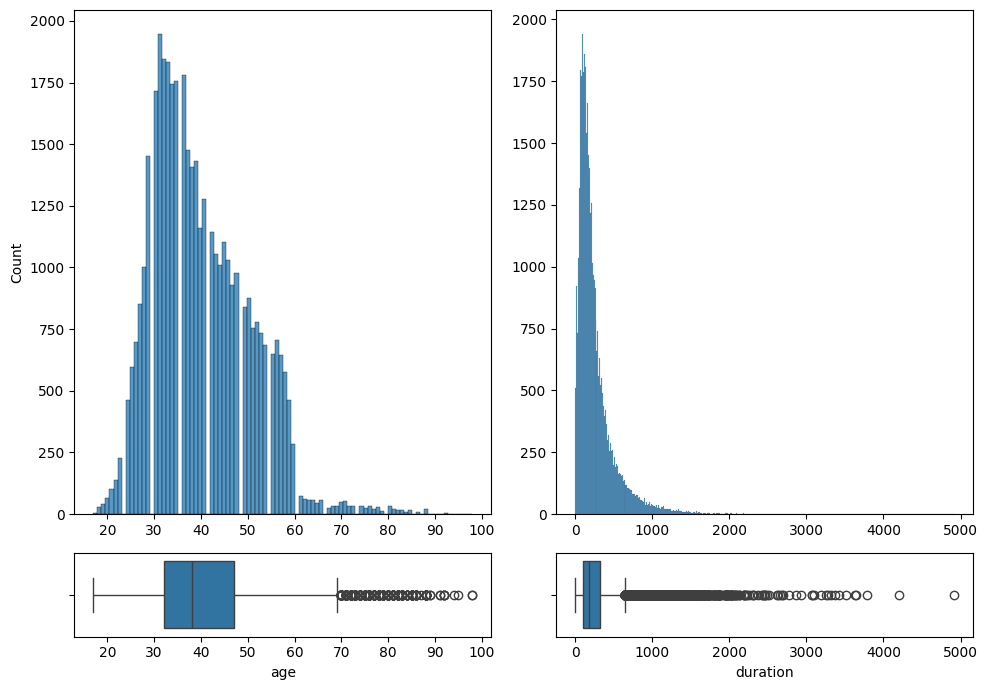

In [14]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = bank_ds2, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = bank_ds2, x = "age")
sns.histplot(ax = axis[0, 1], data = bank_ds2, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = bank_ds2, x = "duration")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

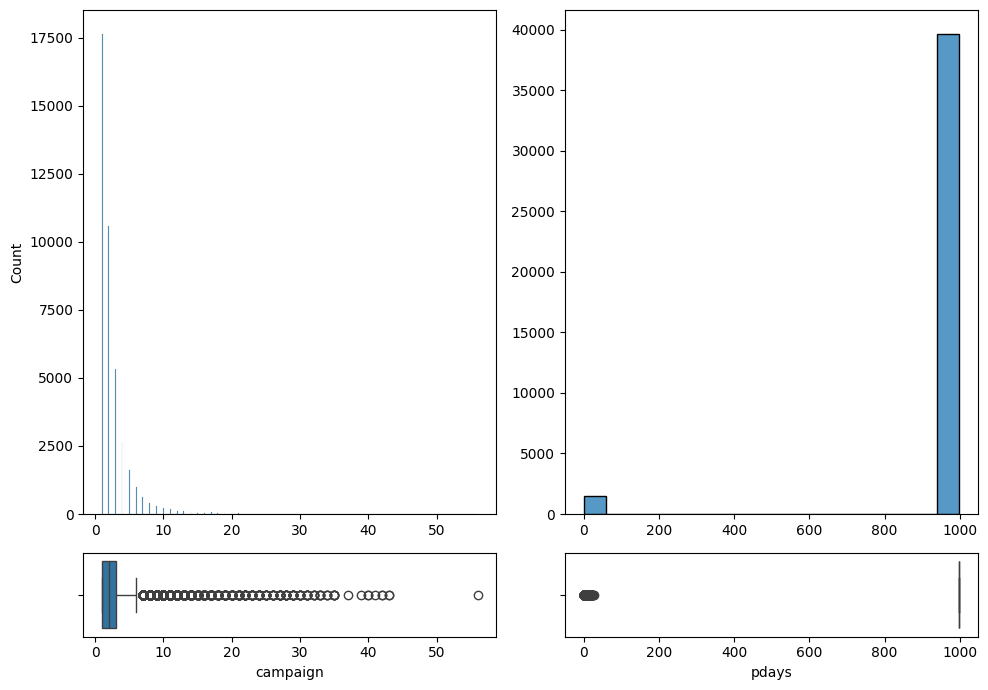

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = bank_ds2, x = "campaign").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = bank_ds2, x = "campaign")
sns.histplot(ax = axis[0, 1], data = bank_ds2, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = bank_ds2, x = "pdays")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

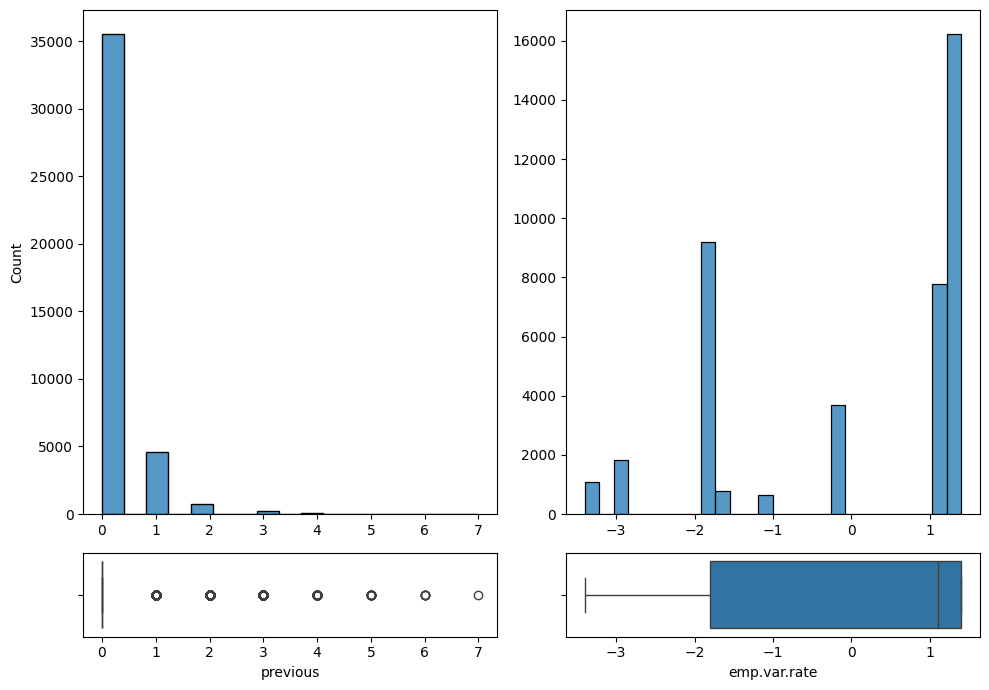

In [16]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = bank_ds2, x = "previous").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = bank_ds2, x = "previous")
sns.histplot(ax = axis[0, 1], data = bank_ds2, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = bank_ds2, x = "emp.var.rate")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

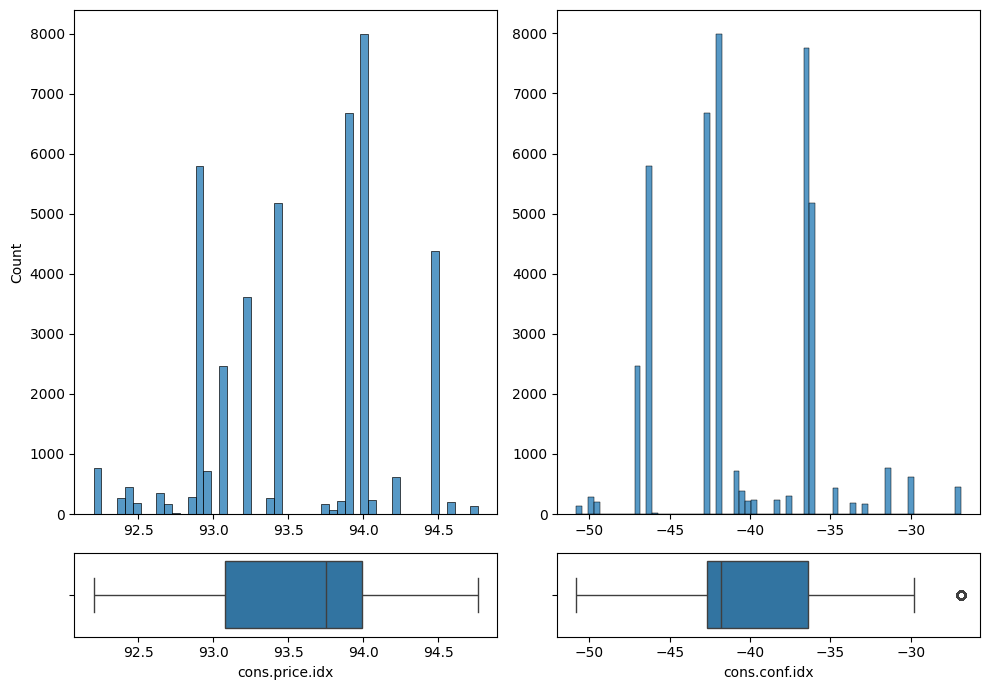

In [17]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = bank_ds2, x = "cons.price.idx").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = bank_ds2, x = "cons.price.idx")
sns.histplot(ax = axis[0, 1], data = bank_ds2, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = bank_ds2, x = "cons.conf.idx")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

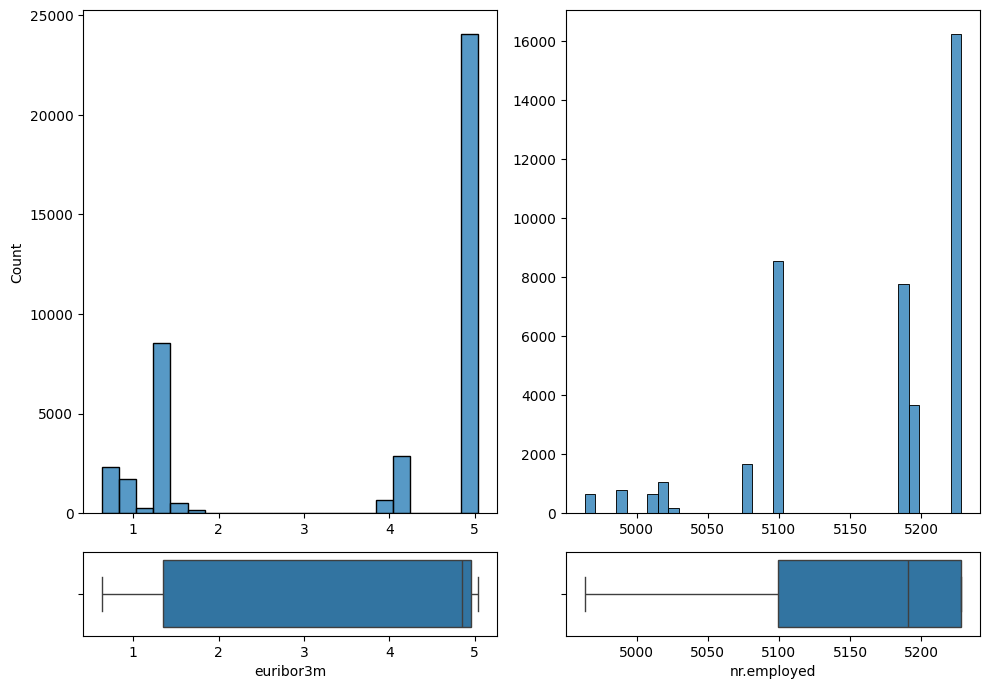

In [18]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = bank_ds2, x = "euribor3m").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = bank_ds2, x = "euribor3m")
sns.histplot(ax = axis[0, 1], data = bank_ds2, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = bank_ds2, x = "nr.employed")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
pip install scikit-learn

In [22]:
#Hot-Coding + MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

bank_ds2["job_n"] = pd.factorize(bank_ds2["job"])[0]
bank_ds2["marital_n"] = pd.factorize(bank_ds2["marital"])[0]
bank_ds2["education_n"] = pd.factorize(bank_ds2["education"])[0]
bank_ds2["default_n"] = pd.factorize(bank_ds2["default"])[0]
bank_ds2["housing_n"] = pd.factorize(bank_ds2["housing"])[0]
bank_ds2["loan_n"] = pd.factorize(bank_ds2["loan"])[0]
bank_ds2["contact_n"] = pd.factorize(bank_ds2["contact"])[0]
bank_ds2["month_n"] = pd.factorize(bank_ds2["month"])[0]
bank_ds2["day_of_week_n"] = pd.factorize(bank_ds2["day_of_week"])[0]
bank_ds2["poutcome_n"] = pd.factorize(bank_ds2["poutcome"])[0]
bank_ds2["y_n"] = pd.factorize(bank_ds2["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(bank_ds2[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = bank_ds2.index, columns = num_variables)
total_data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [23]:
# Feature selection

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("y_n", axis = 1)
y = total_data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980730,1.000000
1,0.0,0.0,0.333333,0.138291,0.512287
2,0.0,0.0,0.937500,0.956926,0.859735
3,0.0,0.0,0.937500,0.957379,0.859735
4,0.0,0.0,0.333333,0.175924,0.512287


In [26]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("clean_train.csv", index = False)
X_test_sel.to_csv("clean_test.csv", index = False)

In [27]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,1.000000,0.980730,1.000000,0.0
1,0.0,0.0,0.333333,0.138291,0.512287,0.0
2,0.0,0.0,0.937500,0.956926,0.859735,0.0
3,0.0,0.0,0.937500,0.957379,0.859735,0.0
4,0.0,0.0,0.333333,0.175924,0.512287,0.0


In [28]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [29]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8921806702282662

In [32]:
#Optimize

from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [33]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [34]:

model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [35]:

y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
accuracy_score(y_test, y_pred)


0.8938805245264692

In [38]:
from pickle import dump

dump(model, open("logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))